In this assignment students have to transform iris data into 3 dimensions and plot a 3d
chart with transformed dimensions and color each data point with specific class.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

In [5]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
irisData = iris.data
print("Dimensions:")
print(irisData.shape)
print("---")
print("First 5 samples:")
print(irisData[:5,:])
print("---")
print("Feature names:")
print(iris.feature_names)

Dimensions:
(150, 4)
---
First 5 samples:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
---
Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [18]:
pca =decomposition.PCA(n_components=3) # two components
pca.fit(irisData) # run PCA, putting in raw version for fun
print("Principal components:")
print(pca.components_)
print("---")
print("Compressed - 4D to 3D:")
print(pca.transform(irisData)[:6,:3]) # first 5 obs
print("---")
print("Reconstructed - 3D to 4D:")
print(pca.inverse_transform(pca.transform(irisData))[:5,:]) # first 5 obs

Principal components:
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]
---
Compressed - 4D to 3D:
[[-2.68420713  0.32660731 -0.02151184]
 [-2.71539062 -0.16955685 -0.20352143]
 [-2.88981954 -0.13734561  0.02470924]
 [-2.7464372  -0.31112432  0.03767198]
 [-2.72859298  0.33392456  0.0962297 ]
 [-2.27989736  0.74778271  0.17432562]]
---
Reconstructed - 3D to 4D:
[[ 5.09968079  3.50032609  1.40048267  0.19924425]
 [ 4.86840068  3.03228058  1.44778117  0.12518657]
 [ 4.69387555  3.20625649  1.30926076  0.18549996]
 [ 4.62409716  3.07538332  1.46356281  0.25705157]
 [ 5.02002788  3.57954033  1.36971595  0.24741729]]


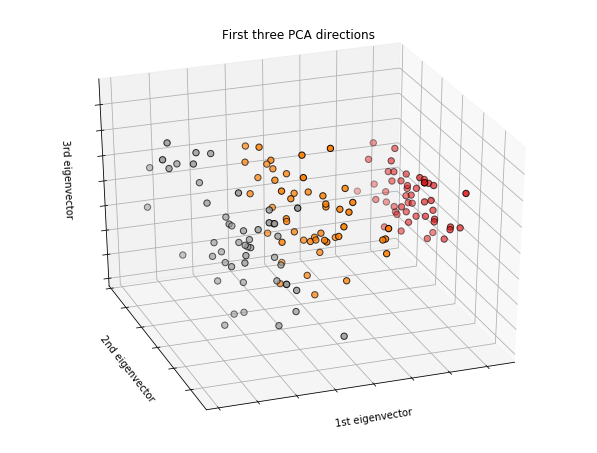

In [20]:
%matplotlib inline
y = iris.target
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = decomposition.PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

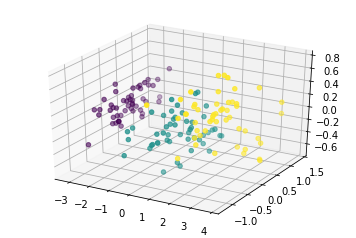

In [25]:
ax1 = plt.axes(projection='3d')

# # Data for a three-dimensional line
# zline = X_reduced[:, 2]
# xline = X_reduced[:, 0]
# yline = X_reduced[:, 1]
# ax1.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata =X_reduced[:, 2]
xdata = X_reduced[:, 0]
ydata = X_reduced[:, 1]
ax1.scatter3D(xdata, ydata, zdata, c=y);